In [39]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import rfft, irfft, fftfreq

In [ ]:
filename = 'measuring results/Sample_name-TiN-Full1.npy'
data = np.load(filename)

In [137]:
sample_rate = 500000000

full_duration = data.shape[2]/sample_rate*1000000

dt = 1/sample_rate

print(data.shape[2])

x_data = np.linspace(0, (data.shape[2]-1)/sample_rate, data.shape[2])

W = fftfreq(data.shape[2], dt)
f_signal = rfft(data)

filtered_f_signal = f_signal.copy()
filtered_f_signal[:,:,(W<300000)] = 0
filtered_f_signal[:,:,(W>5000000)] = 0

print('main_freq = ', W[filtered_f_signal[2,5,:].argmax()]/1000000, 'MHz')

filtered_signal = irfft(filtered_f_signal)



75001
main_freq =  2.7266303115958452 MHz


In [119]:
print(filtered_signal.shape)

(10, 10, 75001)


(300000.0, 5000000.0)

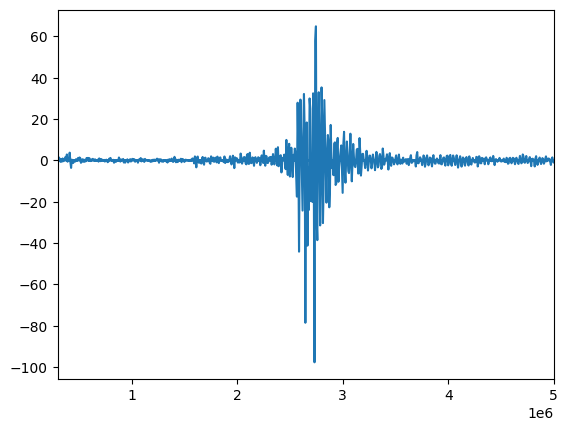

In [152]:
plt.plot(W,filtered_f_signal[0,3])
plt.xlim(300000,5000000)

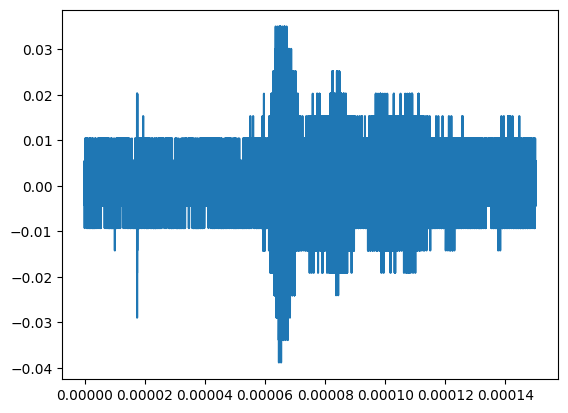

In [96]:
plt.plot(x_data,data[3,3,:])

30000
10000
(35001,)


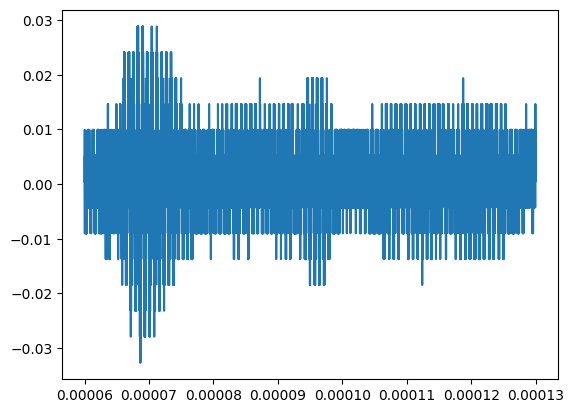

In [97]:
pre_time = 60
post_time = 20

pre_points = int(pre_time*sample_rate/1000000)
post_points = int(post_time*sample_rate/1000000)
print(pre_points)
print(post_points)
print(data[0,0,pre_points:-post_points].shape)
plt.plot(x_data[pre_points:-post_points], data[0,3,pre_points:-post_points])

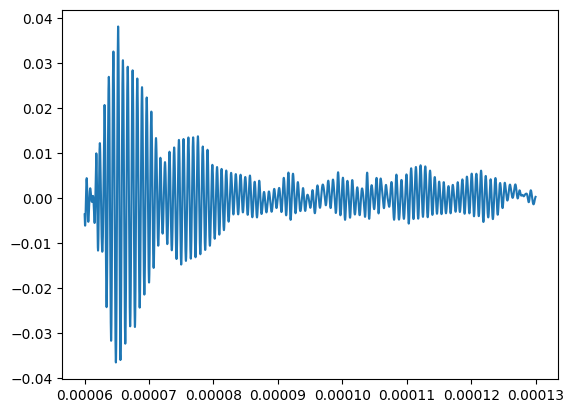

In [135]:
plt.plot(x_data[pre_points:-post_points], filtered_signal[3,5,pre_points:-post_points])

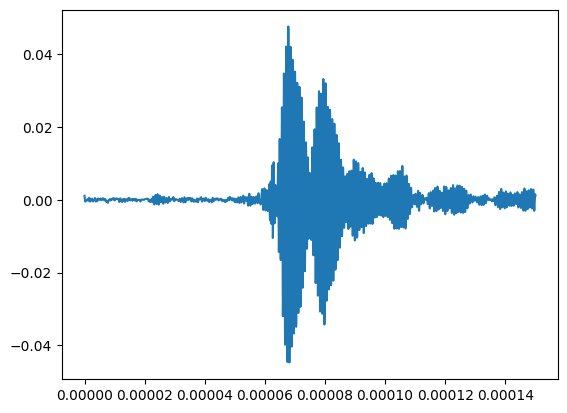

In [142]:
plt.plot(x_data,filtered_signal[4,4])